In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [33]:
alimentos = pd.read_csv('alimentos.csv', sep=',')
alimentos

,Alimento,Calorias (Kcal),Porção (g),Colheres de Sopa,Unidade,Carboidratos (g),Proteínas (g),Gorduras (g),Fonte dos Dados
0,Arroz Branco,97,100.0,6.6,NaN,26.30,2.60,0.20,(TACO)
1,Feijão Preto,132,100.0,6.6,NaN,15.40,9.00,1.40,(TACO)
2,Filé de Frango (grelhado),165,100.0,NaN,1.0,23.60,31.00,3.60,(TACO)
3,Filé de Contrafilé (grelhado),194,100.0,NaN,1.0,0.00,35.00,4.50,(TACO)
4,Filé de Pescada Frito (Tilápia),171,100.0,NaN,1.0,0.00,28.60,8.10,(TACO)
5,Ovo de Galinha Frito,95,50.0,NaN,1.0,5.50,6.30,6.80,(TACO)
6,Ovo de Galinha Cozido,78,50.0,NaN,1.0,5.50,6.30,5.30,(TACO)
7,Azeite de Oliva Extra Virgem,884,100.0,7.5,NaN,0.00,0.00,100.00,(FatSecret)
8,Banana Nanica,92,100.0,NaN,1.0,23.80,1.40,0.40,(TACO)
9,Maçã Fuji,18,182.0,NaN,1.0,4.83,0.09,0.06,(TACO)


In [ ]:
'''
def verificar_medida(id):
    if pd.isnull(alimentos.loc[id, 'Colheres de Sopa']):
        print('Está em unidades')
    else:
        print('Está em colheres de sopa')
'''

In [25]:
novo_alimento = pd.DataFrame([{
    'Alimento': 'Whey (Itambé)',
    'Calorias (Kcal)': 145,
    'Porção (g)': float('nan'),
    'Colheres de Sopa': float('nan'),
    'Unidade': 1,
    'Carboidratos (g)': 14,
    'Proteínas (g)': 15,
    'Gorduras (g)': 2.5,
    'Fonte dos Dados': 'Embalagem'
}])

alimentos = pd.concat([alimentos, novo_alimento], ignore_index=True)
alimentos.to_csv('alimentos.csv', index=False)

## funcao com input()

In [ ]:
lista_codg = []
lista_aux = []
aux = 0

def alimento():

    #codg = int(input('\nCódigo númerico do alimento: '))
    lista_codg.append(codg)
    
    qnt = float(input('Colheres de sopa ou unidades: '))
    
    if (pd.isnull(alimentos.loc[codg, 'Unidade'])):
        aux = qnt/alimentos.loc[codg, 'Colheres de Sopa']
    else:
        aux = qnt/alimentos.loc[codg, 'Unidade']
        
    lista_aux.append(aux)
    
def refeicao():
    
    flag = True

    while flag:

        alimento()

        outro = input('\nInserir outro alimento?(s/n): ')

        if (outro == 'N' or outro == 'n'):
            flag = False


    #mostra os valores da refeição

    calt = 0
    carb = 0
    prot = 0
    gord = 0

    for i in range(len(lista_codg)):
        calt = calt + lista_aux[i] * alimentos.loc[lista_codg[i],'Calorias (Kcal)']
        carb = carb + lista_aux[i] * alimentos.loc[lista_codg[i],'Carboidratos (g)']
        prot = prot + lista_aux[i] * alimentos.loc[lista_codg[i],'Proteínas (g)']
        gord = gord + lista_aux[i] * alimentos.loc[lista_codg[i],'Gorduras (g)']


    print('\nAqui estão algumas informações nutricionais sobre sua refeição:')    
    print('Calorias (Kcal): ', round(calt, 2))
    print('Carboidratos (g): ', round(carb, 2))
    print('Proteínas (g): ', round(prot, 2))
    print('Gorduras (g): ', round(gord, 2))
    
    return {'Calorias (Kcal)': round(calt, 2),
            'Carboidratos (g)': round(carb, 2),
            'Proteínas (g)': round(prot, 2),
            'Gorduras (g)': round(gord, 2)}

## funcao sem input()

In [34]:
def refeicao_sem_input(dicionario):
    
    nomes_alimentos = list(dicionario.keys())
    medidas_alimentos = list(dicionario.values())
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(dicionario)):
        indice = alimentos.loc[alimentos['Alimento'] == nomes_alimentos[i]].index[0]
        
        if (np.isnan(alimentos.loc[indice, 'Unidade'])):
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Colheres de Sopa']
        else:
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Unidade']
            
        medidas_alimentos[i] = aux
   
        calt = calt + medidas_alimentos[i] * alimentos.loc[indice,'Calorias (Kcal)']
        carb = carb + medidas_alimentos[i] * alimentos.loc[indice,'Carboidratos (g)']
        prot = prot + medidas_alimentos[i] * alimentos.loc[indice,'Proteínas (g)']
        gord = gord + medidas_alimentos[i] * alimentos.loc[indice,'Gorduras (g)']


        
    informacoes = {'Calorias (Kcal)': round(calt, 2),
                   'Carboidratos (g)': round(carb, 2),
                   'Proteínas (g)': round(prot, 2),
                   'Gorduras (g)': round(gord, 2)}
    
    return informacoes

## funcao para calcular valores diarios

In [35]:
def valor_diario(refeicoes):
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(refeicoes)):
        calt = calt + refeicoes[i]['Calorias (Kcal)']
        carb = carb + refeicoes[i]['Carboidratos (g)']
        prot = prot + refeicoes[i]['Proteínas (g)']
        gord = gord + refeicoes[i]['Gorduras (g)']
    
    return [round(calt, 2),round(carb, 2),round(prot, 2),round(gord, 2)]

### 15/06

In [37]:
cafe_da_manha = {
    'Banana Nanica': 1,
    'Leite Integral': 0.5,
    'Hipercalórico': 0.5,
    'Aveia em Flocos (Nestlé)': 3,
    'Ovo de Galinha Cozido': 3
}

almoco = {
    'Arroz Branco': 8,
    'Feijão Preto': 8,
    'Filé de Contrafilé (grelhado)': 1.5,
    'Azeite de Oliva Extra Virgem': 1
}

cafe_da_tarde = {
    'Hipercalórico': 0.5,
    'Whey (Itambé)': 2
}

janta = {
    'Arroz Branco': 6,
    'Feijão Preto': 4,
    'Filé de Frango (grelhado)': 1.5,
    'Azeite de Oliva Extra Virgem': 1
}

In [38]:
manha_valores = refeicao_sem_input(cafe_da_manha)
manha_valores

{'Calorias (Kcal)': 609.0,
 'Carboidratos (g)': 86.1,
 'Proteínas (g)': 31.0,
 'Gorduras (g)': 21.85}

In [39]:
almoco_valores = refeicao_sem_input(almoco)
almoco_valores

{'Calorias (Kcal)': 686.44,
 'Carboidratos (g)': 50.55,
 'Proteínas (g)': 66.56,
 'Gorduras (g)': 22.02}

In [40]:
tarde_valores = refeicao_sem_input(cafe_da_tarde)
tarde_valores

{'Calorias (Kcal)': 404.5,
 'Carboidratos (g)': 53.0,
 'Proteínas (g)': 33.0,
 'Gorduras (g)': 5.25}

In [41]:
janta_valores = refeicao_sem_input(janta)
janta_valores

{'Calorias (Kcal)': 533.55,
 'Carboidratos (g)': 68.64,
 'Proteínas (g)': 54.32,
 'Gorduras (g)': 19.76}

--------

In [42]:
#refeicoes = [cafe_da_manha, almoco, cafe_da_tarde]
refeicoes = [manha_valores, almoco_valores, tarde_valores, janta_valores]

In [43]:
valores_diarios = valor_diario(refeicoes)

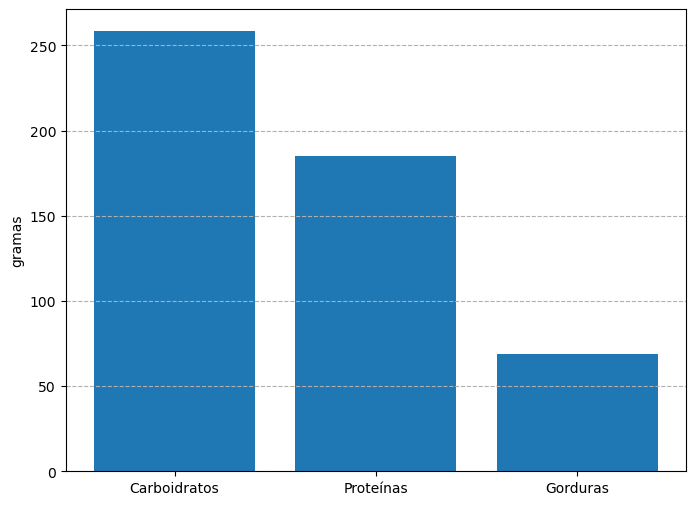

In [44]:
plt.figure(figsize=(8,6))
plt.bar(['Carboidratos', 'Proteínas', 'Gorduras'], valores_diarios[1:])
plt.ylabel('gramas')
plt.grid(axis='y', linestyle='--')

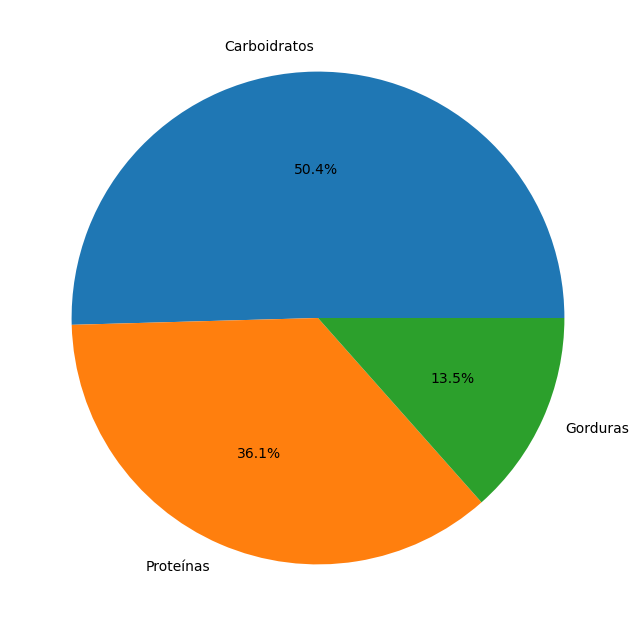

In [45]:
plt.figure(figsize=(10, 8))
plt.pie(valores_diarios[1:], labels=['Carboidratos', 'Proteínas', 'Gorduras'] , autopct="%1.1f%%")

plt.show()


In [46]:
print('Calorias em Kcal:',valores_diarios[0])

Calorias em Kcal: 2233.49


In [49]:
print('Calorias (Kcal):',valores_diarios[0],
      '\nCarboidratos (g):',valores_diarios[1],
      '\nProteínas (g):',valores_diarios[2],
      '\nGorduras (g):',valores_diarios[3])

Calorias (Kcal): 2233.49 
Carboidratos (g): 258.29 
Proteínas (g): 184.88 
Gorduras (g): 68.88


----